Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

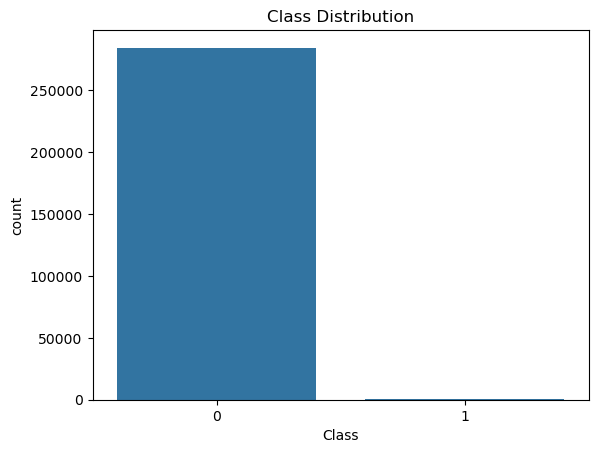

Under-sampling dataset shape: Counter({0: 344, 1: 344})
SMOTE dataset shape: Counter({0: 199020, 1: 199020})
ADASYN dataset shape: Counter({1: 199035, 0: 199020})
LogisticRegression with Under-sampling:
Confusion Matrix:
[[83381  1914]
 [   17   131]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

LogisticRegression with SMOTE:
Confusion Matrix:
[[83410  1885]
 [   18   130]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Step 1: Load Dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['Class'].value_counts())

# Visualize the class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Step 3: Data Preprocessing
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Handling Imbalanced Data

# Under-sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print(f"Under-sampling dataset shape: {Counter(y_res)}")

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE dataset shape: {Counter(y_smote)}")

# ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print(f"ADASYN dataset shape: {Counter(y_adasyn)}")

# Step 5: Model Training and Evaluation

# Function to train and evaluate a model
def train_evaluate_model(model, X_train_res, y_train_res, X_test, y_test, method):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} with {method}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
lr = LogisticRegression()

# Logistic Regression with Under-sampling
train_evaluate_model(lr, X_res, y_res, X_test, y_test, "Under-sampling")

# Logistic Regression with SMOTE
train_evaluate_model(lr, X_smote, y_smote, X_test, y_test, "SMOTE")

# Logistic Regression with ADASYN
train_evaluate_model(lr, X_adasyn, y_adasyn, X_test, y_test, "ADASYN")

# Decision Tree
dt = DecisionTreeClassifier()

# Decision Tree with Under-sampling
train_evaluate_model(dt, X_res, y_res, X_test, y_test, "Under-sampling")

# Decision Tree with SMOTE
train_evaluate_model(dt, X_smote, y_smote, X_test, y_test, "SMOTE")

# Decision Tree with ADASYN
train_evaluate_model(dt, X_adasyn, y_adasyn, X_test, y_test, "ADASYN")

# Random Forest
rf = RandomForestClassifier()

# Random Forest with Under-sampling
train_evaluate_model(rf, X_res, y_res, X_test, y_test, "Under-sampling")

# Random Forest with SMOTE
train_evaluate_model(rf, X_smote, y_smote, X_test, y_test, "SMOTE")

# Random Forest with ADASYN
train_evaluate_model(rf, X_adasyn, y_adasyn, X_test, y_test, "ADASYN")

# Step 6: Comparison and Insights
# Summarize the results and draw insights
